![ Download wiki dump ](NLP1.png)

In [1]:
from bs4 import BeautifulSoup
import os

# Path to downloaded wiki files
input_folder = "downloaded_site/te.wikipedia.org/wiki"
output_folder = "downloaded_text"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

def clean_text(text):
    """Remove unwanted sections and clean extracted text."""
    unwanted_sections = ["మరింత చదవండి", "ఇవి కూడా చూడండి", "పుస్తక సూచిక", "మూలాలు"]
    lines = text.split("\n")
    filtered_lines = []
    
    skip_section = False
    for line in lines:
        if any(section in line for section in unwanted_sections):
            skip_section = True
        if not skip_section:
            filtered_lines.append(line)
    return "\n".join(filtered_lines)

def extract_text_from_html(file_path):
    """Extract main text content from an HTML file."""
    with open(file_path, "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, "html.parser")

    # Find main content div
    main_content = soup.find("div", class_="mw-parser-output")
    if not main_content:
        return ""

    # Extract text while skipping unwanted sections
    text = clean_text(main_content.get_text(separator="\n"))
    return text

# Process all HTML files in the wiki folder
for filename in os.listdir(input_folder):
    if filename.endswith(".html"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename.replace(".html", ".txt"))

        text_content = extract_text_from_html(input_path)
        with open(output_path, "w", encoding="utf-8") as output_file:
            output_file.write(text_content)

        print(f"Converted: {filename} -> {output_path}")

print("HTML to text conversion completed!")

Converted: దస్త్రం:Nagulachativi_poster_chandamama.JPG.html -> downloaded_text/దస్త్రం:Nagulachativi_poster_chandamama.JPG.txt
Converted: వర్గం:ప్రజా_ఉద్యమాలు.html -> downloaded_text/వర్గం:ప్రజా_ఉద్యమాలు.txt
Converted: వాడుకరి_చర్చ:Heyaaaaalol.html -> downloaded_text/వాడుకరి_చర్చ:Heyaaaaalol.txt
Converted: వర్గం:భారతదేశపు_పర్యాటక_ప్రదేశాలు.html -> downloaded_text/వర్గం:భారతదేశపు_పర్యాటక_ప్రదేశాలు.txt
Converted: వికీపీడియా:Administration_FAQ.html -> downloaded_text/వికీపీడియా:Administration_FAQ.txt
Converted: మార్చి_21.html -> downloaded_text/మార్చి_21.txt
Converted: Public_domain.html -> downloaded_text/Public_domain.txt
Converted: చర్చ:నీలం_సంజీవరెడ్డి.html -> downloaded_text/చర్చ:నీలం_సంజీవరెడ్డి.txt
Converted: వర్గం:భారతదేశ_రాష్ట్రాలు,_ప్రాంతాలు.html -> downloaded_text/వర్గం:భారతదేశ_రాష్ట్రాలు,_ప్రాంతాలు.txt
Converted: డార్లెనిస్_ఒబ్రెగాన్.html -> downloaded_text/డార్లెనిస్_ఒబ్రెగాన్.txt
Converted: చర్చ:సర్వేపల్లి_రాధాకృష్ణన్.html -> downloaded_text/చర్చ:సర్వేపల్లి_రాధాకృష్ణన్.txt
C

In [2]:
import re

input_file = 'downloaded_text/corpus.txt'
output_file = 'downloaded_text/sentence-corpus.txt'

decimal_pattern = re.compile(r'\d+\.\d+')
telugu_abbreviations = {'డా.', 'శ్రీ.', 'కుం.', 'ప్రొ.', 'జే.ఎన్.', 'ఇ.స.'}

def preprocess_text(text):
    return re.sub(r'\s+', ' ', text.strip())

def tokenize_sentences(text):
    text = decimal_pattern.sub(lambda m: m.group().replace('.', '@DOT@'), text)
    for abbr in telugu_abbreviations:
        text = text.replace(abbr, abbr.replace('.', '@ABBR@'))
    
    sentences = re.split(r'(?<=[.!?।॥])\s+', text)
    
    return [s.replace('@DOT@', '.').replace('@ABBR@', '.').strip() for s in sentences]

with open(input_file, 'r', encoding='utf-8') as infile:
    raw_text = infile.read()

cleaned_text = preprocess_text(raw_text)
sentences = tokenize_sentences(cleaned_text)

with open(output_file, 'w', encoding='utf-8') as outfile:
    outfile.write("\n".join(sentences) + "\n")

print("Sentence tokenization complete! Saved as 'sentence-corpus.txt'.")

Sentence tokenization complete! Saved as 'sentence-corpus.txt'.


In [3]:
input_file = 'downloaded_text/sentence-corpus.txt'
output_file = 'downloaded_text/sentence-stats.txt'

def calculate_statistics(sentences):
    stats = []
    total_words = 0

    for i, sentence in enumerate(sentences, start=1):
        word_count = len(sentence.split())
        char_count = len(sentence)
        total_words += word_count
        stats.append((i, word_count, char_count))
    
    avg_words = total_words / len(sentences) if sentences else 0
    
    return stats, avg_words

if os.path.exists(input_file):
    with open(input_file, 'r', encoding='utf-8') as infile:
        sentences = [line.strip() for line in infile if line.strip()]

    stats, avg_words = calculate_statistics(sentences)

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write("Sentence ID | Total Words | Total Characters\n")
        outfile.write("-" * 40 + "\n")
        for sid, words, chars in stats:
            outfile.write(f"{sid:<11} | {words:<12} | {chars}\n")
        outfile.write(f"\nAverage words per sentence: {avg_words:.2f}\n")

    print(f"Statistics saved to '{output_file}'.")

else:
    print(f"Error: '{input_file}' not found.")

Statistics saved to 'downloaded_text/sentence-stats.txt'.


In [4]:
input_file = "downloaded_text/sentence-corpus.txt"
output_file = "downloaded_text/cleanCorpus.txt"

allowed_punctuation = {".", "!", "?", "।", "॥"}

def clean_text(text):
    return "".join(char if char.isalnum() or char.isspace() or char in allowed_punctuation else "" for char in text)

with open(input_file, "r", encoding="utf-8") as infile:
    sentences = infile.readlines()

cleaned_sentences = [clean_text(sentence.strip()) for sentence in sentences]

with open(output_file, "w", encoding="utf-8") as outfile:
    outfile.write("\n".join(cleaned_sentences) + "\n")

print("Cleaned corpus saved as 'cleanCorpus.txt'.")

Cleaned corpus saved as 'cleanCorpus.txt'.


[nltk_data] Downloading package punkt to /home/harini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 110 (n)

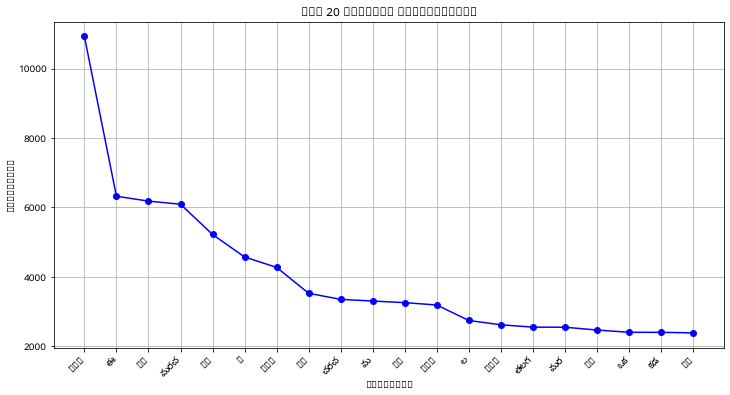

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 84 (T) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 66 (B) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 105 (i) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lib/python3/dist-packages/IPython/core/pyla

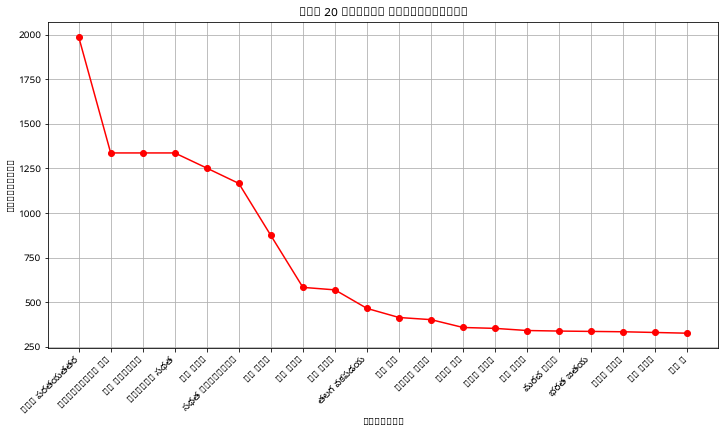

Word unigram and bigram frequencies saved successfully!


In [5]:
import nltk
import re
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist, bigrams

# Download necessary NLTK resources
nltk.download('punkt')

# File paths
input_file = 'downloaded_text/cleanCorpus.txt'
unigram_file = 'wordUnigramFreq.txt'
bigram_file = 'wordBigramFreq.txt'

# Read and preprocess the corpus
with open(input_file, 'r', encoding='utf-8') as f:
    text = f.read().lower()  # Convert to lowercase

# Tokenization: Capture both English and Telugu words
tokens = word_tokenize(text)

# Filter tokens to retain only Telugu and English words (ignoring special characters)
tokens = [token for token in tokens if re.match(r'[a-zA-Z\u0C00-\u0C7F]+', token)]

# Generate unigram frequencies
unigram_freq = FreqDist(tokens)

# Save unigram frequencies
with open(unigram_file, 'w', encoding='utf-8') as f:
    for word, freq in unigram_freq.items():
        f.write(f"{word}\t{freq}\n")

# Generate bigrams
bigrams_list = list(bigrams(tokens))
bigram_freq = FreqDist(bigrams_list)

# Save bigram frequencies
with open(bigram_file, 'w', encoding='utf-8') as f:
    for (w1, w2), freq in bigram_freq.items():
        f.write(f"{w1} {w2}\t{freq}\n")

# Set font to support Telugu characters (if installed)
plt.rcParams['font.family'] = 'Noto Sans Telugu'

# Plot top 20 unigrams as a line plot
top_unigrams = unigram_freq.most_common(20)
unigram_labels, unigram_counts = zip(*top_unigrams)

plt.figure(figsize=(12, 6))
plt.plot(unigram_labels, unigram_counts, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Unigram Frequencies")
plt.xlabel("Unigrams")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Plot top 20 bigrams as a line plot
top_bigrams = bigram_freq.most_common(20)
bigram_labels = [f"{w1} {w2}" for (w1, w2), _ in top_bigrams]
bigram_counts = [count for _, count in top_bigrams]

plt.figure(figsize=(12, 6))
plt.plot(bigram_labels, bigram_counts, marker='o', linestyle='-', color='r')
plt.xticks(rotation=45, ha='right')
plt.title("Top 20 Bigram Frequencies")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.grid()
plt.show()

print("Word unigram and bigram frequencies saved successfully!")

In [6]:
import pandas as pd

# Load unigram frequency file (Telugu words)
file_path = "wordUnigramFreq.txt"  # Ensure this file contains Telugu words

# Read the file and handle multiple spaces properly
df = pd.read_csv(file_path, sep="\s+", header=None, names=["word", "frequency"], engine="python")

# Convert frequency column to integers (to avoid sorting issues)
df["frequency"] = df["frequency"].astype(int)

# Sort words by frequency in descending order
df = df.sort_values(by="frequency", ascending=False)

# Extract top frequent words as stopwords (adjust the number as needed)
stopwords = df.head(100)["word"].tolist()  # Adjust based on analysis

# Save to stopwordList.txt
stopword_file = "stopwordList.txt"
with open(stopword_file, "w", encoding="utf-8") as f:  # Overwrite the file
    for word in stopwords:
        f.write(word + "\n")

print("\nStopwords saved to 'stopwordList.txt'")


Stopwords saved to 'stopwordList.txt'


In [7]:
import string

# Load stopwords from stopwordList.txt
def load_stopwords(stopword_file):
    with open(stopword_file, "r", encoding="utf-8") as f:
        stopwords = set(word.strip() for word in f.readlines())  # Remove extra spaces/newlines
    return stopwords

# Clean word (remove punctuation and lowercase)
def clean_word(word):
    return word.strip(string.punctuation)  # Normalize word for matching

# Remove stopwords from a sentence
def remove_stopwords(sentence, stopwords):
    words = sentence.split()
    filtered_words = [word for word in words if clean_word(word) not in stopwords]
    return " ".join(filtered_words)

# Process the sentence-corpus.txt file
def process_corpus(input_file, stopword_file, output_file):
    stopwords = load_stopwords(stopword_file)

    with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8") as outfile:
        for line in infile:
            cleaned_sentence = remove_stopwords(line.strip(), stopwords)
            outfile.write(cleaned_sentence + "\n")

# File paths
input_file = "sentence-corpus.txt"
stopword_file = "stopwordList.txt"
output_file = "removedStopword.txt"

# Run the function
process_corpus(input_file, stopword_file, output_file)

print("\nStopwords removed and saved to 'removedStopword.txt'")


Stopwords removed and saved to 'removedStopword.txt'
